# Classification of Income Level

## Load packages and dataset

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [177]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data') 
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [178]:
df.shape

(32560, 15)

The columns are not named clearly. Update the column names.

In [179]:
df.columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
                'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'Income']     

In [180]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Dataset Preprocessing
- Data type of each column
- Null values and missing values

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [183]:
# Drop fnlwgt column because it is not related
del df['fnlwgt']
df.shape

(32560, 14)

There is no missing values in the dataset. Data types (numerical or object) are reasonable

### Exploratory Data Analysis
- dataset shape
- class weights
- Numerical features distribution
- Categorical features 

Dataset shape and class weights

In [184]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [185]:
df['Income'].value_counts(normalize=True)

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

There is a class imbalance problem. need to address it. 

In [187]:
t = df.dtypes
print(t)
num_cols = t[t.values=='int64'].index.tolist()
cat_cols = t[t.values=='object'].index.tolist()[:-1]
label = 'Income'
print("numerical columns: ", num_cols)
print('Categorical columns: ', cat_cols)

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object
numerical columns:  ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical columns:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


Categorical Columns

In [190]:
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 marital-status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 occupation
 Prof-specialty 

columns: workclass, occupation, native-country has missing values of '?'

In [191]:
for col in cat_cols:
    df[col] = df[col].str.strip()

In [203]:
# Count how many rows has missing values
df.loc[(df['workclass'] == '?') | (df['occupation']=='?') | (df['native-country']=='?')].shape

(2399, 14)

In [204]:
2399/df.shape[0]

0.07367936117936118

about 7% of the data has missing values. So remove the missing values

In [205]:
df = df.loc[(df['workclass'] != '?') & (df['occupation']!='?') & (df['native-country']!='?')]

In [206]:
df.shape

(30161, 14)

Numerical Columns Distribution

<=50K    22653
>50K      7508
Name: Income, dtype: int64


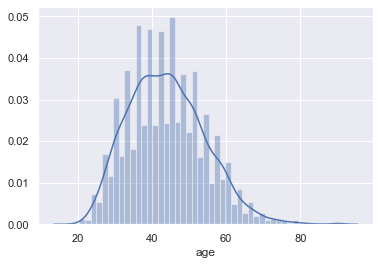

In [215]:
# remove white space characters from income
print(df['Income'].value_counts())
df['Income'] = df['Income'].str.strip()
sns.distplot(df[df['Income']=='>50K']['age'])

In [216]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.437883,10.121216,1091.971984,88.375419,40.931269
std,13.134882,2.549983,7406.466659,404.304753,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


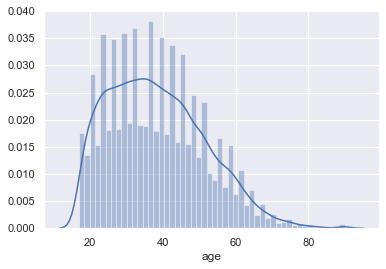

In [217]:
sns.distplot(df['age'])

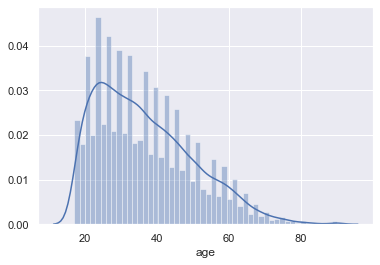

In [218]:
sns.distplot(df[df['Income']=='<=50K']['age'])

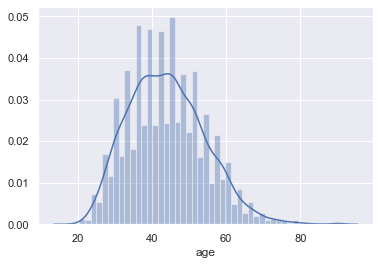

In [219]:
sns.distplot(df[df['Income']=='>50K']['age'])

In [220]:
def num_dist_plot(df, num_col):
    print(num_col)

    print(df[num_col].describe())
    
    sns.distplot(df[num_col])
    plt.show()

    print("When income >50K, the distribution of ", num_col)
    sns.distplot(df[df['Income']=='>50K'][num_col])
    plt.show()

    print("When income <=50K, the distribution of ", num_col)
    sns.distplot(df[df['Income']=="<=50K"][num_col])
    plt.show()


age
count    30161.000000
mean        38.437883
std         13.134882
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


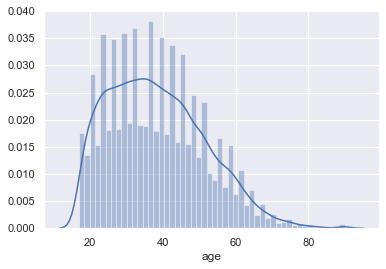

When income >50K, the distribution of  age


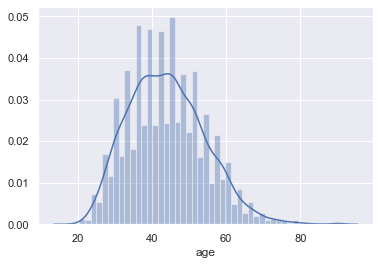

When income <=50K, the distribution of  age


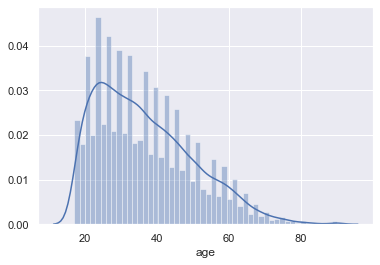

In [221]:
num_dist_plot(df, 'age')

education-num
count    30161.000000
mean        10.121216
std          2.549983
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: education-num, dtype: float64


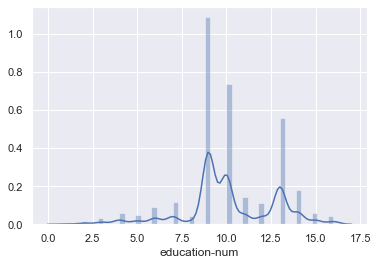

When income >50K, the distribution of  education-num


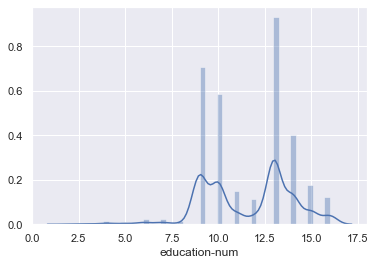

When income <=50K, the distribution of  education-num


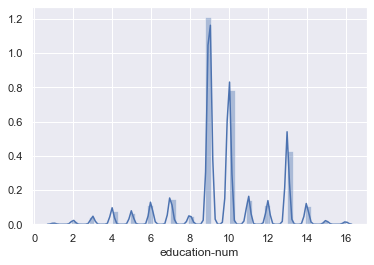

In [222]:
num_dist_plot(df, 'education-num')

In [223]:
df['education-num'].value_counts().sort_index()

1       45
2      151
3      288
4      557
5      455
6      820
7     1048
8      377
9     9840
10    6678
11    1307
12    1008
13    5043
14    1627
15     542
16     375
Name: education-num, dtype: int64

In [67]:
num_dist_plot(df,'capital-gain')

capital-gain
count    32560.000000
mean      1077.615172
std       7385.402999
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

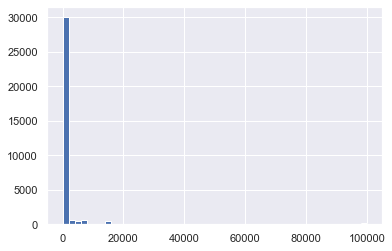

In [69]:
(df['capital-gain']).hist(bins=50)

In [72]:
df2 = df.copy()
df2['capital-gain_cat']=df2['capital-gain'].apply(lambda x: 0 if x == 0 else 1)

In [73]:
df2['capital-gain_cat'].value_counts()

0    29849
1     2711
Name: capital-gain_cat, dtype: int64

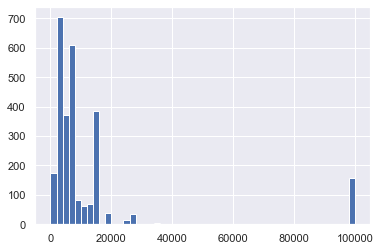

In [77]:
df2[df2['capital-gain_cat']==1]['capital-gain'].hist(bins=50)

In [79]:
df2[df2['capital-gain_cat']==1]['capital-gain'].describe()

count     2711.000000
mean     12942.511988
std      22398.590323
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital-gain, dtype: float64

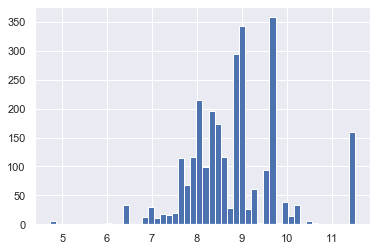

In [86]:
np.log(df2[df2['capital-gain_cat']==1]['capital-gain']).hist(bins=50)

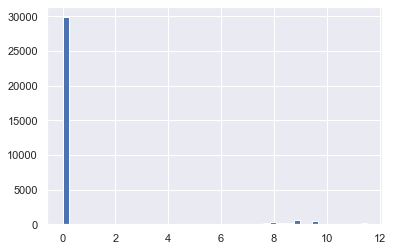

In [87]:
np.log(df['capital-gain']+1).hist(bins=50)

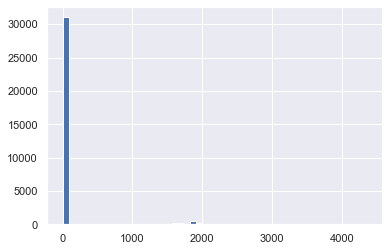

In [89]:
df['capital-loss'].hist(bins=50)

In [90]:
df['capital-loss'].describe()

count    32560.000000
mean        87.306511
std        402.966116
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

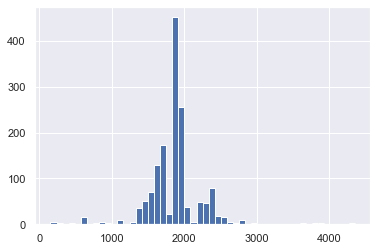

In [91]:
df[df['capital-loss']>0]['capital-loss'].hist(bins=50)

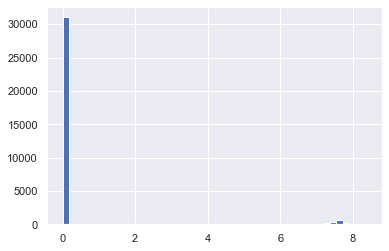

In [92]:
np.log(df['capital-loss']+1).hist(bins=50)

hours-per-week
count    32560.000000
mean        40.437469
std         12.347618
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64


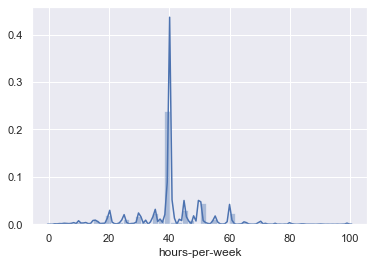

When income >50K, the distribution of  hours-per-week


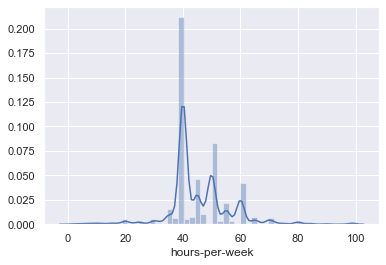

When income <=50K, the distribution of  hours-per-week


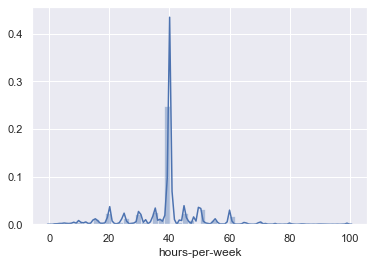

In [93]:
num_dist_plot(df, 'hours-per-week')

In [97]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [107]:
df.groupby(['workclass','Income']).count()['age']

workclass          Income
 ?                 <=50K      1645
                   >50K        191
 Federal-gov       <=50K       589
                   >50K        371
 Local-gov         <=50K      1476
                   >50K        617
 Never-worked      <=50K         7
 Private           <=50K     17733
                   >50K       4963
 Self-emp-inc      <=50K       494
                   >50K        622
 Self-emp-not-inc  <=50K      1817
                   >50K        724
 State-gov         <=50K       944
                   >50K        353
 Without-pay       <=50K        14
Name: age, dtype: int64

In [111]:
df.groupby(['education','Income']).count()['age']

education      Income
 10th          <=50K      871
               >50K        62
 11th          <=50K     1115
               >50K        60
 12th          <=50K      400
               >50K        33
 1st-4th       <=50K      162
               >50K         6
 5th-6th       <=50K      317
               >50K        16
 7th-8th       <=50K      606
               >50K        40
 9th           <=50K      487
               >50K        27
 Assoc-acdm    <=50K      802
               >50K       265
 Assoc-voc     <=50K     1021
               >50K       361
 Bachelors     <=50K     3133
               >50K      2221
 Doctorate     <=50K      107
               >50K       306
 HS-grad       <=50K     8826
               >50K      1675
 Masters       <=50K      764
               >50K       959
 Preschool     <=50K       51
 Prof-school   <=50K      153
               >50K       423
 Some-college  <=50K     5904
               >50K      1387
Name: age, dtype: int64

In [114]:
df.groupby(['marital-status','Income']).count()['age']


marital-status          Income
 Divorced               <=50K      3980
                        >50K        463
 Married-AF-spouse      <=50K        13
                        >50K         10
 Married-civ-spouse     <=50K      8284
                        >50K       6692
 Married-spouse-absent  <=50K       384
                        >50K         34
 Never-married          <=50K     10191
                        >50K        491
 Separated              <=50K       959
                        >50K         66
 Widowed                <=50K       908
                        >50K         85
Name: age, dtype: int64

In [117]:
df.groupby(['occupation','Income']).count()['age']

occupation          Income
 ?                  <=50K     1652
                    >50K       191
 Adm-clerical       <=50K     3262
                    >50K       507
 Armed-Forces       <=50K        8
                    >50K         1
 Craft-repair       <=50K     3170
                    >50K       929
 Exec-managerial    <=50K     2098
                    >50K      1968
 Farming-fishing    <=50K      879
                    >50K       115
 Handlers-cleaners  <=50K     1284
                    >50K        86
 Machine-op-inspct  <=50K     1752
                    >50K       250
 Other-service      <=50K     3158
                    >50K       137
 Priv-house-serv    <=50K      148
                    >50K         1
 Prof-specialty     <=50K     2281
                    >50K      1859
 Protective-serv    <=50K      438
                    >50K       211
 Sales              <=50K     2667
                    >50K       983
 Tech-support       <=50K      645
                    >50K    

In [123]:
df_relaship = df[['relationship','age']].groupby(['relationship']).count()
df_relaship

,age
relationship,
Husband,13193
Not-in-family,8304
Other-relative,981
Own-child,5068
Unmarried,3446
Wife,1568


In [124]:
# df.groupby(['relationship','Income']).count()['age']
df_relaship_income = df[['relationship','Income','age']].groupby(['relationship','Income']).count()
df_relaship_income

age
relationship    Income      
 Husband        <=50K   7275
                >50K    5918
 Not-in-family  <=50K   7448
                >50K     856
 Other-relative <=50K    944
                >50K      37
 Own-child      <=50K   5001
                >50K      67
 Unmarried      <=50K   3228
                >50K     218
 Wife           <=50K    823
                >50K     745

In [133]:
df_relaship_income_pct = df_relaship_income.div(df_relaship, level='relationship') * 100
df_relaship_income_pct.reset_index().pivot(index='relationship', columns='Income', values='age')

Income,<=50K,>50K
relationship,,
Husband,55.142879,44.857121
Not-in-family,89.691715,10.308285
Other-relative,96.228338,3.771662
Own-child,98.677979,1.322021
Unmarried,93.673825,6.326175
Wife,52.487245,47.512755


In [129]:
df_relaship_income2 = df_relaship_income.reset_index()
df_relaship_income2.pivot(index='relationship', columns='Income', values='age')

Income,<=50K,>50K
relationship,,
Husband,7275,5918
Not-in-family,7448,856
Other-relative,944,37
Own-child,5001,67
Unmarried,3228,218
Wife,823,745


In [137]:
df_relaship = df[['relationship','age']].groupby(['relationship']).count()
df_relaship
df_relaship_income = df[['relationship','Income','age']].groupby(['relationship','Income']).count()
df_relaship_income
df_relaship_income.reset_index().pivot(index='relationship', columns='Income', values='age')

df_relaship_income_pct = df_relaship_income.div(df_relaship, level='relationship') * 100
df_relaship_income_pct_pivot = df_relaship_income_pct.reset_index().pivot(index='relationship', columns='Income', values='age')
df_relaship_income_pct_pivot

Income,<=50K,>50K
relationship,,
Husband,55.142879,44.857121
Not-in-family,89.691715,10.308285
Other-relative,96.228338,3.771662
Own-child,98.677979,1.322021
Unmarried,93.673825,6.326175
Wife,52.487245,47.512755


In [142]:
df_race = df[['race','age']].groupby(['race']).count()
# df_race
df_race_income = df[['race','Income','age']].groupby(['race','Income']).count()
# df_race_income
df_race_income_pivot = df_race_income.reset_index().pivot(index='race', columns='Income', values='age')
# df_race_income_pivot
df_race_income_pct = df_race_income.div(df_race, level='race') * 100
df_race_income_pct_pivot = df_race_income_pct.reset_index().pivot(index='race', columns='Income', values='age')
df_race_income_pct_pivot

Income,<=50K,>50K
race,,
Amer-Indian-Eskimo,88.424437,11.575563
Asian-Pac-Islander,73.435996,26.564004
Black,87.612036,12.387964
Other,90.774908,9.225092
White,74.413086,25.586914


In [143]:
df_race_income_pivot

Income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


In [144]:
df_sex = df[['sex','age']].groupby(['sex']).count()
# df_sex
df_sex_income = df[['sex','Income','age']].groupby(['sex','Income']).count()
# df_sex_income
df_sex_income_pivot = df_sex_income.reset_index().pivot(index='sex', columns='Income', values='age')
# df_sex_income_pivot
df_sex_income_pct = df_sex_income.div(df_sex, level='sex') * 100
df_sex_income_pct_pivot = df_sex_income_pct.reset_index().pivot(index='sex', columns='Income', values='age')
df_sex_income_pct_pivot


Income,<=50K,>50K
sex,,
Female,89.053941,10.946059
Male,69.424939,30.575061


In [145]:
df_sex_income_pivot

Income,<=50K,>50K
sex,,
Female,9592,1179
Male,15127,6662


In [148]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income']

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [149]:
df_native_country = df[['native-country','age']].groupby(['native-country']).count()
# df_native_country
df_native_country_income = df[['native-country','Income','age']].groupby(['native-country','Income']).count()
# df_native_country_income
df_native_country_income_pivot = df_native_country_income.reset_index().pivot(index='native-country', columns='Income', values='age')
# df_native_country_income_pivot
df_native_country_income_pct = df_native_country_income.div(df_native_country, level='native-country') * 100
df_native_country_income_pct_pivot = df_native_country_income_pct.reset_index().pivot(index='native-country', columns='Income', values='age')
df_native_country_income_pct_pivot


Income,<=50K,>50K
native-country,,
?,74.957118,25.042882
Cambodia,63.157895,36.842105
Canada,67.768595,32.231405
China,73.333333,26.666667
Columbia,96.610169,3.389831
Cuba,73.684211,26.315789
Dominican-Republic,97.142857,2.857143
Ecuador,85.714286,14.285714
El-Salvador,91.509434,8.490566


In [150]:
df_native_country_income_pivot

Income,<=50K,>50K
native-country,,
?,437.0,146.0
Cambodia,12.0,7.0
Canada,82.0,39.0
China,55.0,20.0
Columbia,57.0,2.0
Cuba,70.0,25.0
Dominican-Republic,68.0,2.0
Ecuador,24.0,4.0
El-Salvador,97.0,9.0


In [151]:
df['native-country'].value_counts(normalize=True)

 United-States                 0.895854
 Mexico                        0.019748
 ?                             0.017905
 Philippines                   0.006081
 Germany                       0.004208
 Canada                        0.003716
 Puerto-Rico                   0.003501
 El-Salvador                   0.003256
 India                         0.003071
 Cuba                          0.002918
 England                       0.002764
 Jamaica                       0.002488
 South                         0.002457
 China                         0.002303
 Italy                         0.002242
 Dominican-Republic            0.002150
 Vietnam                       0.002058
 Guatemala                     0.001966
 Japan                         0.001904
 Poland                        0.001843
 Columbia                      0.001812
 Taiwan                        0.001566
 Haiti                         0.001351
 Iran                          0.001321
 Portugal                      0.001136


In [156]:
l = [1 if x == 'United-States' else 0 for x in df['native-country'].str.strip()]
# values, counts = np.unique(l, return_counts=True)
print(np.unique(l, return_counts=True))

(array([0, 1]), array([ 3391, 29169], dtype=int64))


In [158]:
df['native-country2']=[1 if x == 'United-States' else 0 for x in df['native-country'].str.strip()]


In [159]:
# df_native_country
df_native_country2_income = df[['native-country2','Income','age']].groupby(['native-country2','Income']).count()


In [161]:
# df_native_country_income
df_native_country2_income_pivot = df_native_country2_income.reset_index().pivot(index='native-country2', columns='Income', values='age')

In [162]:
df_native_country2_income_pivot

Income,<=50K,>50K
native-country2,,
0,2721,670
1,21998,7171


In [165]:
df_native_country2 = df[['native-country2','age']].groupby(['native-country2']).count()


In [168]:
df_native_country2_income_pct = df_native_country2_income.div(df_native_country2, level='native-country2') * 100
df_native_country2_income_pct_pivot = df_native_country2_income_pct.reset_index().pivot(index='native-country2', columns='Income', values='age')
df_native_country2_income_pct_pivot

Income,<=50K,>50K
native-country2,,
0,80.241817,19.758183
1,75.415681,24.584319


In [94]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Income']

## Imbalanced Class

In [170]:
df['Income'].value_counts(normalize=True)

<=50K    0.759183
>50K     0.240817
Name: Income, dtype: float64

In [171]:
df[df['occupation'] == " ?"].shape

(1843, 16)

In [173]:
df[df['native-country'] == " ?"].shape

(583, 16)

In [175]:
df[df['workclass'] == " ?"].shape

(1836, 16)